## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи регрессии, или задачи классификации.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, f1_score 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

### Загрузка данных

In [2]:
# Обучающая выборка
data = pd.read_csv('https://raw.githubusercontent.com/eldor-galiev/ObesityClassification-ML-project/master/new_data.csv', sep=",")

In [3]:
# Удалим дубликаты записей, если они присутствуют
data = data.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасета


In [4]:
# Первые 10 строк датасета
data.head(10)

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
5,50,Female,140,40,16.7,Underweight
6,55,Male,200,110,34.2,Obese
7,60,Female,130,30,13.3,Underweight
8,65,Male,210,120,37.2,Obese
9,70,Female,120,20,10.0,Underweight


In [5]:
# Размер датасета
data.shape

(108, 6)

In [6]:
# Список колонок
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [7]:
# Список колонок с типами данных 
data.dtypes

Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [8]:
# Проверим наличие пустых значений
data.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [9]:
data.describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


### Построение графиков для понимания структуры данных

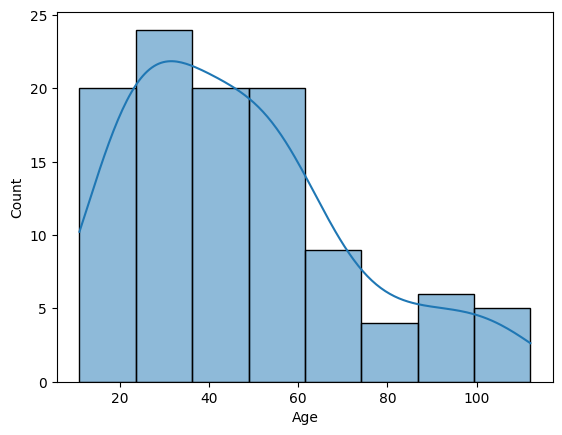

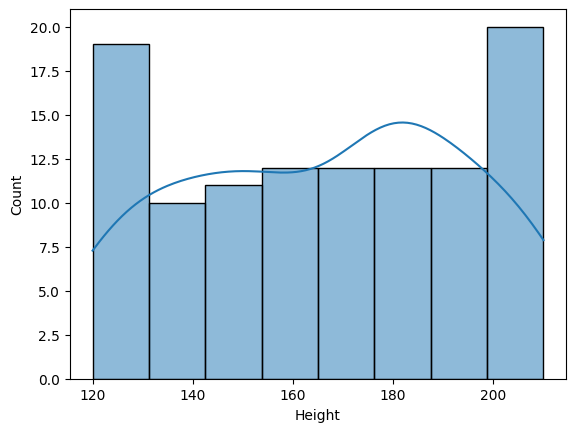

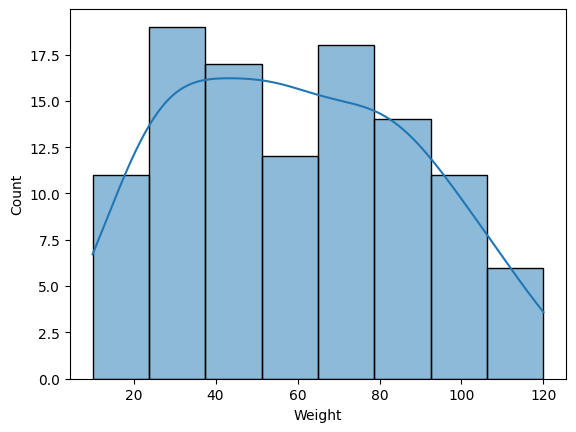

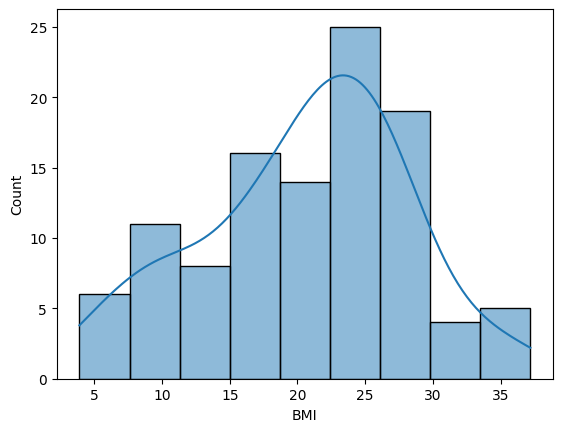

In [10]:
list_of_variable = ['Age','Height', 'Weight', 'BMI']
for col in list_of_variable:
    sns.histplot(data[col],kde="True")
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Категориальные признаки Gender и Label закодируем при помощи подхода LabelEncoding.

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним Min-Max масштабирование данных.

In [11]:
labelencoder = LabelEncoder()
data.Label = labelencoder.fit_transform(data.Label)
data.Gender = labelencoder.fit_transform(data.Gender)

In [12]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


In [13]:
# Числовые колонки для масштабирования
scale_cols = ['Age', 'Gender', 'Height', 'Weight', 'BMI']

In [14]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [15]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [16]:
data.head()

,Age,Gender,Height,Weight,BMI,Label,Age_scaled,Gender_scaled,Height_scaled,Weight_scaled,BMI_scaled
0,25,1,175,80,25.3,0,0.138614,1.0,0.611111,0.636364,0.642643
1,30,0,160,60,22.5,0,0.188119,0.0,0.444444,0.454545,0.558559
2,35,1,180,90,27.3,2,0.237624,1.0,0.666667,0.727273,0.702703
3,40,0,150,50,20.0,3,0.287129,0.0,0.333333,0.363636,0.483483
4,45,1,190,100,31.2,1,0.336634,1.0,0.777778,0.818182,0.819820


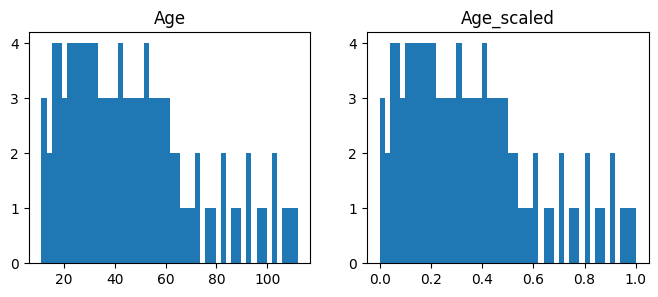

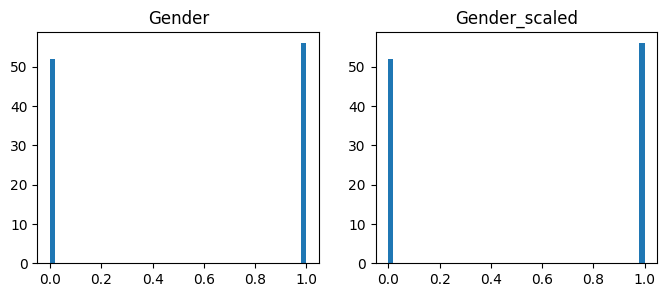

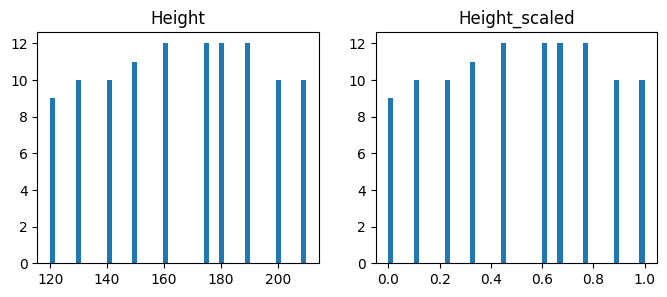

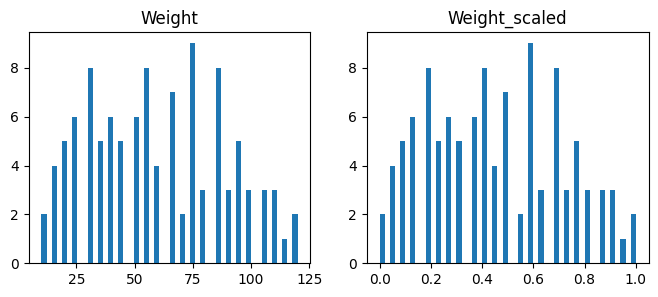

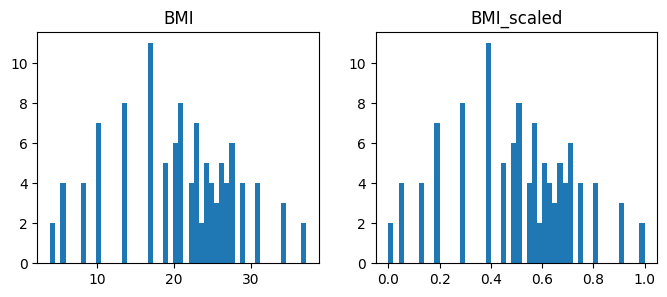

In [17]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [18]:
corr_cols_1 = scale_cols + ['Label']
corr_cols_1

['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']

In [19]:
scale_cols_postfix = [ x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['Label']
corr_cols_2

['Age_scaled',
 'Gender_scaled',
 'Height_scaled',
 'Weight_scaled',
 'BMI_scaled',
 'Label']

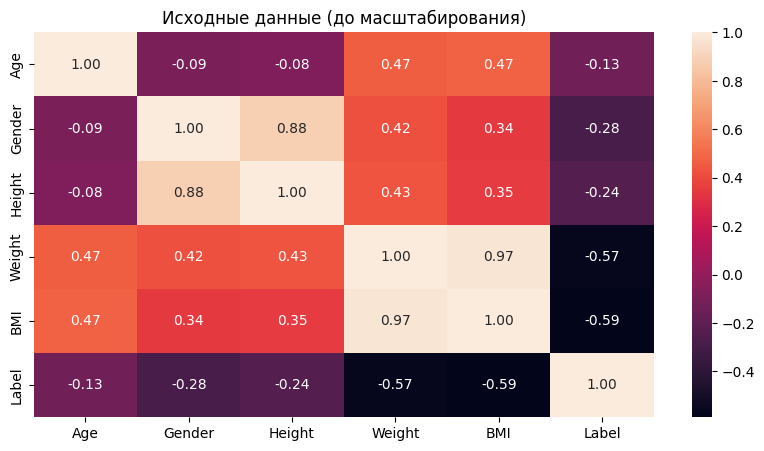

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

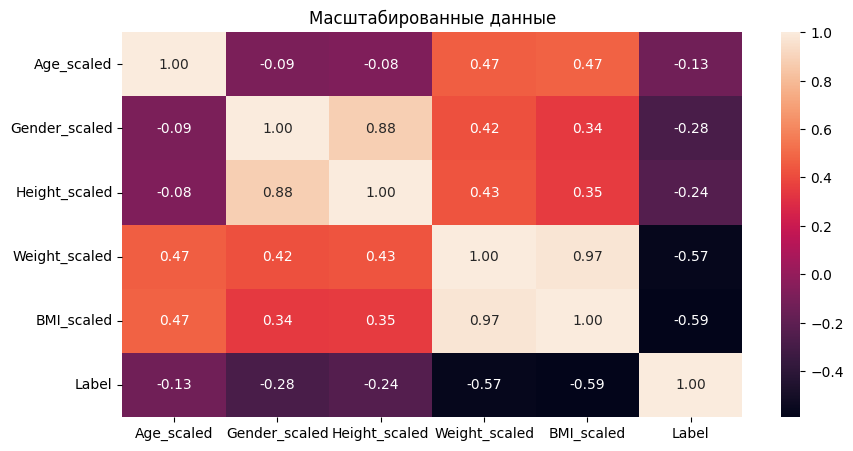

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи классификации будем использовать:
#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)



#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)


## Выбор наиболее подходящих моделей для решения задачи классификации.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Случайный лес

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [22]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки с помощью фильтра
task_clas_cols = ['Age_scaled', 'Gender_scaled', 'Height_scaled', 'Weight_scaled', 'BMI_scaled']
clas_x = data[task_clas_cols].values
clas_y = data['Label'].values
clas_X_train, clas_X_test, clas_y_train, clas_y_test = train_test_split(clas_x, clas_y, test_size=0.2, random_state=42)
clas_X_train.shape, clas_X_test.shape, clas_y_train.shape, clas_y_test.shape

((86, 5), (22, 5), (86,), (22,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [23]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'RF':RandomForestClassifier()
               }

In [24]:
def clas_train_model(model_name, model):
    model.fit(clas_X_train, clas_y_train)
    y_pred = model.predict(clas_X_test)
    
    precision = precision_score(clas_y_test, y_pred, average='macro')
    f1 = f1_score(clas_y_test, y_pred, average='macro')

    print('{} \t precision={}, f1={}'.format(
        model_name, precision, f1, 3))

In [25]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model)

LogR 	 precision=0.575, f1=0.5793650793650794
KNN_5 	 precision=0.8583333333333334, f1=0.8392857142857142
RF 	 precision=1.0, f1=1.0


## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [26]:
clas_X_train.shape

(86, 5)

In [27]:
n_range = np.array(range(1,50,2))
tuned_parameters = [{'n_neighbors': n_range}]
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [28]:
clas_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='precision_micro')
clas_gs.fit(clas_X_train, clas_y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])}],
             scoring='precision_micro')

In [29]:
# Лучшая модель
clas_gs.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [30]:
# Лучшее значение параметров
clas_gs.best_params_

{'n_neighbors': 1}

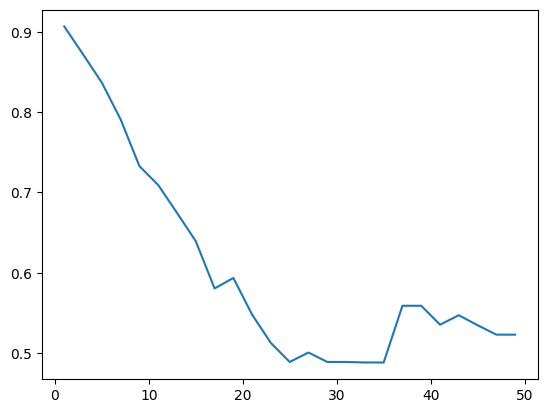

In [31]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clas_gs.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [32]:
clas_gs_best_params_txt = str(clas_gs.best_params_['n_neighbors'])
clas_gs_best_params_txt

'1'

In [33]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    str('KNN_'+clas_gs_best_params_txt):clas_gs.best_estimator_}

In [34]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model)

KNN_5 	 precision=0.8583333333333334, f1=0.8392857142857142
KNN_1 	 precision=0.8583333333333334, f1=0.8392857142857142


## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [35]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model)

LogR 	 precision=0.575, f1=0.5793650793650794
KNN_5 	 precision=0.8583333333333334, f1=0.8392857142857142
RF 	 precision=1.0, f1=1.0


In [36]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model)   

KNN_5 	 precision=0.8583333333333334, f1=0.8392857142857142
KNN_1 	 precision=0.8583333333333334, f1=0.8392857142857142


Вывод: лучшей оказалась модель на основе метода случайного леса.